## 아파트 실거래가 자료를 활용한 자료의 왜도, 첨도, 상관계수 분석

In [1]:
import pandas as pd
apt = pd.read_excel('data/아파트_실거래가_서울.xlsx')
apt.columns

Index(['시군구', '번지', '본번', '부번', '단지명', '전용면적(㎡)', '계약년월', '계약일', '거래금액(만원)',
       '층', '건축년도', '도로명', '시', '구', '동'],
      dtype='object')

In [2]:
apt.rename(columns = {'전용면적(㎡)' : '면적', '거래금액(만원)' : '가격'}, inplace = True)
apt['단가'] = apt.가격 / apt.면적

### 왜도

In [3]:
apt.단가.skew()

1.4466494691261553

$\Rightarrow$ 왜도 값이 양수이므로 오른쪽으로 긴 꼬리를 가진 분포임을 유추할 수 있음

In [4]:
apt.groupby('구').단가.skew().sort_values()

구
중구     -1.138508
광진구    -0.326935
중랑구    -0.104560
서대문구    0.084265
양천구     0.108413
마포구     0.126780
도봉구     0.134094
강남구     0.136494
동작구     0.178899
관악구     0.218343
강동구     0.232884
강서구     0.238819
은평구     0.344090
서초구     0.403509
구로구     0.467667
강북구     0.467760
영등포구    0.483777
용산구     0.507903
성북구     0.513295
송파구     0.614263
종로구     0.650344
동대문구    0.679297
성동구     0.815622
금천구     0.849881
노원구     1.560726
Name: 단가, dtype: float64

$\Rightarrow$ 왜도의 값이 가장 작은 경우인 중구의 경우 왜도 값이 음수이므로 왼쪽으로 긴 꼬리를 가진 분포임을 유추할 수 있음  
    
$\Rightarrow$ 왜도의 값이 가장 큰 경우인 노원구의 경우 왜도 값이 양수이므로 오른쪽으로 긴 꼬리를 가진 분포임을 유추할 수 있음

$\Rightarrow$ 나중에 데이터 시각화를 통해서 이 결과들을 확인해보겠음 

### 첨도 

In [5]:
apt.단가.kurtosis()b

2.459797217130168

$\Rightarrow$ 첨도 값이 양수이므로 정규분포에 비해서 두꺼운 꼬리를 가진 분포임을 할 수 있음

In [10]:
apt.단가[apt.구 =='중구'].kurtosis()

4.1183923294119165

$\Rightarrow$ 중구의 경우 첨도 값이 양수이고 절대값이 크므로 더 두꺼운 꼬리를 가진 분포임을 할 수 있음

In [11]:
apt.단가[apt.구 =='금천구'].kurtosis()

0.07791654954512062

$\Rightarrow$ 금천구의 경우 첨도 값이 0에 가까우므로 정규분포와 비슷한 정도의 꼬리 분포를 가지고 있음을 알 수 있음 

### 상관계수 

In [12]:
apt['가격'].corr(apt['면적'])

0.7014737005275267

In [13]:
apt.corr()

,본번,부번,면적,계약년월,계약일,가격,층,건축년도,단가
본번,1.000000,-0.043314,0.037966,NaN,-0.001331,-0.009692,0.052481,0.125874,-0.035729
부번,-0.043314,1.000000,0.018763,NaN,0.004707,0.026304,0.007855,0.018034,-0.028287
면적,0.037966,0.018763,1.000000,NaN,-0.016001,0.701474,0.072077,-0.096709,0.109304
계약년월,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
계약일,-0.001331,0.004707,-0.016001,NaN,1.000000,-0.025741,0.000283,0.019883,-0.026598
가격,-0.009692,0.026304,0.701474,NaN,-0.025741,1.000000,0.170319,-0.054922,0.718276
층,0.052481,0.007855,0.072077,NaN,0.000283,0.170319,1.000000,0.166106,0.182343
건축년도,0.125874,0.018034,-0.096709,NaN,0.019883,-0.054922,0.166106,1.000000,0.000182
단가,-0.035729,-0.028287,0.109304,NaN,-0.026598,0.718276,0.182343,0.000182,1.000000


$\Rightarrow$ 상관계수가 0.7 ($70\%$)이므로 가격과 면적은 상당히 높은 양의 상관관계를 가지고 있는 것으로 보임. 두 변수의 선형관계에 대한 추가 분석은 다음 차시에서 보도록 하겠음 

In [14]:
import numpy as np
x = pd.Series(np.arange(-20, 21))
y = x ** 2
x.corr(y)

0.0

(<AxesSubplot:>, <AxesSubplot:>)

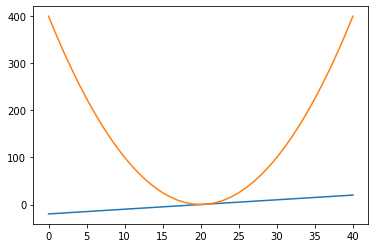

In [18]:
x.plot(), y.plot()

$\Rightarrow$ y값이 x로부터 계산되어 서로 연관되어 있지만 계산된 상관계수는 0 : 비선형 관계를 반영하지 못함  